## 5. Lasso Regresyon (Lasso Regression)

Lasso (En Küçük Mutlak Daraltma ve Seçim Operatörü - Least Absolute Shrinkage and Selection Operator), lineer regresyonun **L1** düzenlileştirme (regularization) eklenmiş durumudur. Temel amaç, gereksiz özelliklerin (features) katsayılarını **tam olarak sıfıra çekerek** otomatik **özellik seçimi (feature selection)** yapmaktır.

Ridge regresyondan farkı, katsayıları küçültmek yerine bazılarını sıfırlayabilmesidir.

Özellikleri:
* Bazı katsayıları tam sıfır yapar.
* Otomatik özellik seçimi sağlar.
* Aşırı öğrenmeyi önler.

Denklem:

$$
    Hata(MSE_{Lasso}) = (y_{gercek} - (a+bX))^2 + \lambda |b|
$$
$$    
    Hata(MSE_{Lasso}) = \sum{(y_{gercek} - (a+bX))^2} + \lambda \sum{|b|}
$$

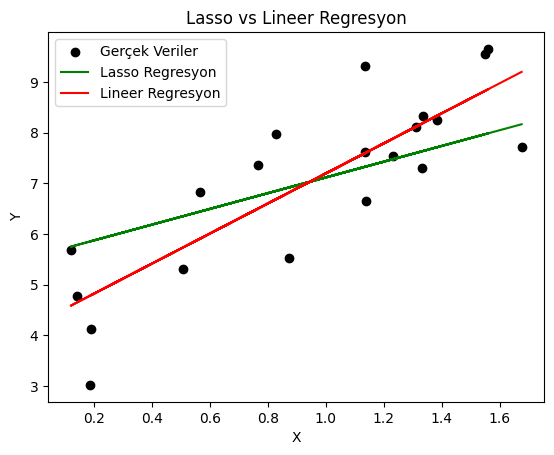

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split

# Veri üretimi
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=13)

# Lasso Regresyon Modeli
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)

# Lineer Regresyon Modeli
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Tahminler 
y_pred_lasso = lasso_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Grafik Çizim
plt.scatter(X_test, y_test, color="black", label="Gerçek Veriler")
plt.plot(X_test, y_pred_lasso, color="green", label="Lasso Regresyon")
plt.plot(X_test, y_pred_linear, color="red", label="Lineer Regresyon")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lasso vs Lineer Regresyon")
plt.show()

## 6. Elastic Net Regresyon

**Elastic Net Regresyon,** Ridge (L2) ve Lasso (L1) regresyonlarının birleşiminden oluşan güçlü bir regresyon modelidir. Her ikisinin avantajlarını birleştirerek, hem aşırı uyumu önler hem de özellik seçimi (feature selection) yapabilir.

Denklem:

$$
Cost = \sum {(y_i - \hat{y}_i)^2} + \lambda_1 \sum \left| \beta_j \right| + \lambda_2 \sum \beta_j^2
$$

Yani:

$$
Cost = Hata + L1 \space cezası \space (Lasso) + L2 \space cezası \space (Ridge)
$$



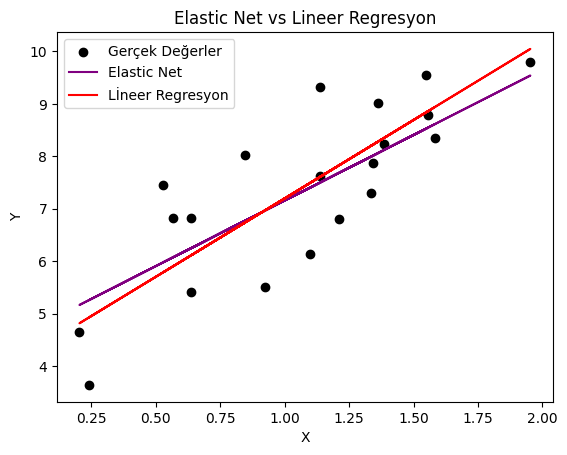

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split

# Veri Üretimi
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elastic Net Modeli
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # %50 L1, %50 L2
elastic_model.fit(X_train, y_train)

# Lineer Regresyon
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Tahminler
y_pred_elastic = elastic_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Grafik çizim
plt.scatter(X_test, y_test, color="black", label="Gerçek Değerler")
plt.plot(X_test, y_pred_elastic, color="purple", label="Elastic Net")
plt.plot(X_test, y_pred_linear, color="red", label="Lİneer Regresyon")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Elastic Net vs Lineer Regresyon")
plt.show()

| Durum                              | Ridge | Lasso | Elastic Net |
| ---------------------------------- | ----- | ----- | ----------- |
| Çoklu değişken korelasyonu varsa   | ❌     | ❌     | ✅           |
| Özellik seçimi yapmak istersen     | ❌     | ✅     | ✅           |
| Tüm katsayıları küçültmek istersen | ✅     | ✅     | ✅           |
| En iyi genellemeyi istersen        | 🔸    | 🔸    | ✅           |


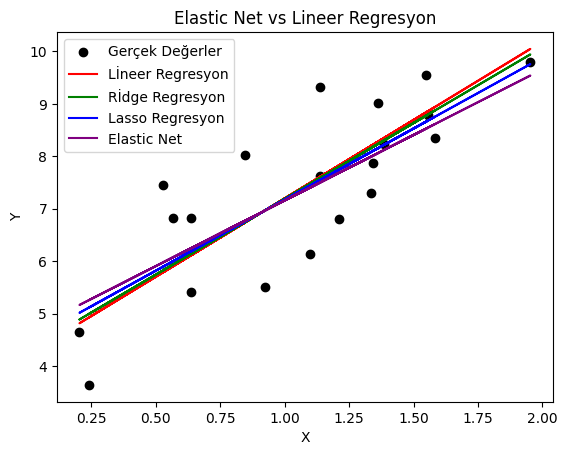

In [14]:
# Ridge, Lasso, Elastic Net ve Lineer Regresyon modellerini hepsini koyalım

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Veri Üretimi
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elastic Net Modeli
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5) # %50 L1, %50 L2
elastic_model.fit(X_train, y_train)

# Lineer Regresyon
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Ridge Regresyon
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso Regresyon
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Tahminler
y_pred_elastic = elastic_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Grafik çizim
plt.scatter(X_test, y_test, color="black", label="Gerçek Değerler")
plt.plot(X_test, y_pred_linear, color="red", label="Lİneer Regresyon")
plt.plot(X_test, y_pred_ridge, color="green", label="Rİdge Regresyon")
plt.plot(X_test, y_pred_lasso, color="blue", label="Lasso Regresyon")
plt.plot(X_test, y_pred_elastic, color="purple", label="Elastic Net")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Elastic Net vs Lineer Regresyon")
plt.show()

## 7. Destek Vektör Regresyonu (Support Vektor Regression - SVR)

SVR, Support Vector Machhine (SVM) algoritmasının regresyon (sürekli değer tahmini) için uyarlanmış halidir.

Klasik regresyon modellerinden farklı olarak SVR, sadece veriye en iyi uyan doğruyu çizmekle kalmaz, aynı zamanda hata payı ($\epsilon$- insensitive zone) içinde kalan tahminleri cezalandırmaz.

Amaç: SVR, tahmin edilen değerlerin gerçek değerlere **belirli bir tolerans ($\epsilon$) dahilinde** yakın olmasını sağlar. Yani:
* Gerçek değerler $y_i$ ile tahmindeki değeler $\hat y_i$ arasındaki fark $\epsilon$'dan küçükse --> cezalandırmaz.
* Fark $\epsilon$'dan büyükse --> model ceza uygular

Denklem:

$$
y = w^Tx +b 
$$

* Model, yukarıdaki denklem ile bir regresyon çizgisi çizmeye çalışır. 
* Amaç: bu çizgiden en fazla $\epsilon$ kadar uzaklıkta kalan tüm noktaları içeren bir "tüp-boru (tube)" oluşturmak
* Tüpün dışında kalan noktalar için ceza uygulanır.
* Destek vektörleri, bu tüpe değen veya dışına çıkan noktalar olur (modelin kararını etkileyenler).

Avantajları:
* Lineer olmayan verilerde kernel fonksiyonu sayesinde güçlü performans gösterebilir.
* Aykırı değerlere karşı daha dayanıklıdır (epsilon ile)

Dezavantajları:
* Büyük veri kümelerinde eğitim süresi uzayabilir.
* Parametre seçimi (C, epsilon, kernel) hassastır, dikkatle ayarlanmalı (Grid Search önerilir).

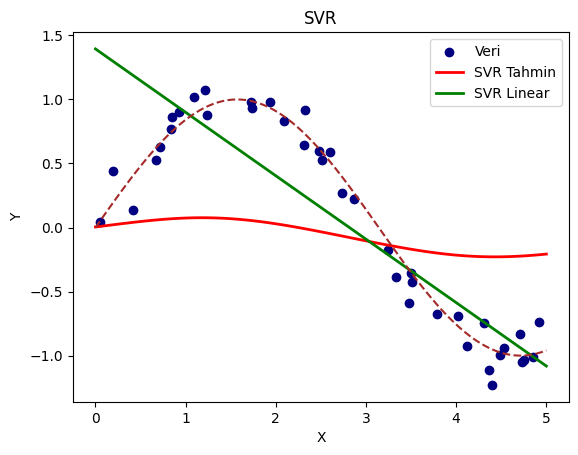

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Veri üretelim
np.random.seed(9)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) # Gürültü sinüs

# SVR Modeli
svr_rbf = SVR(kernel="rbf", C=200, epsilon=1)
# kernel --> Veriyi dönüştürmek için kullanılan fonksiyon
    # rbf : Doğrusal olmayan ilişkiler
    # linear : Doğrusal ilişkiler
    # poly : Polinomsal dönüşüm
    # sigmoid :
    # precomputed :
# C --> Hata ceza parametresi. 
    # Küçük C: Daha geniş marj, daha fazla hata tolere eder
    # Büyük C: Daha dar marj, hatalara sert ceza
# epsilon --> Marj genişliği
    # Küçük E: Daha hassas model (overfitting riski)
    # Büyük E: Daha toleranslı model
svr_rbf.fit(X,y)
svr_linear = SVR(kernel="linear", C=100, epsilon=0.1)
svr_linear.fit(X,y)

# Tahmin
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = svr_rbf.predict(X_test)
y_pred_linear = svr_linear.predict(X_test)

y_True = np.sin(X_test).ravel()

# Grafik çizim
plt.scatter(X, y, color="navy", label="Veri")
plt.plot(X_test, y_pred, color="red", lw=2, label="SVR Tahmin")
plt.plot(X_test, y_pred_linear, color="green", lw=2, label="SVR Linear")
plt.plot(X_test, y_True, color="brown", linestyle="--")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SVR")
plt.show()

# RBF Kernel çoğu durumda başlangıç için iyi bir tercih.